$\textbf{Exercise 2.  An Optimization Algorithm}$ \\

$\textbf{Ans 1.}$ \\

The problem (1) can be written as:

\begin{align}
\min_w f(w)= \min_w \ \sum_{i=1}^{n} f_i (w)     
\end{align}

where appropriate choice of  $f_i(w)$ as \\
\begin{align}
\underset{w \in R^d}{\text{min}} f_i(w) = \frac{\lambda}{2n}\mathbf{w^Tw} + \frac{1}{n} L(y_i, w^\top x_i) 
\end{align}



$\textbf{Ans 2.}$  \\

Consider the loss function:
\begin{equation*}
L_h = max\{0, 1 - y_i \mathbf{w^T}\mathbf{x_i}\}
\end{equation*}  \\
then appropriate choice of  $f_i(w)$ function as following : \\

\begin{equation*}
f_i(\mathbf{w}) = \frac{\lambda}{2n} \mathbf{w^Tw} + \frac{1}{n}max\{0, 1 - y_i \mathbf{w^T}\mathbf{x_i}\}
\end{equation*}

In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data.shape)
A = iris.data

#check the shape of iris target
print(iris.target.shape)
print(iris.target)

n = iris.data.shape[0] #Number of data points
d = iris.data.shape[1] #Dimension of data points

y = 1.0*np.ones([A.shape[0],1])

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
for i in range(iris.target.shape[0]):
  if iris.target[i] != 1:
    y[i] = -1

#Create an index array
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices

train_data = []
train_label = []
test_data = []
test_label = []
count = 1
for i in indexarr:
  if count <= int(0.8*n):
    train_data.append(list(A[i]))
    train_label.append(list(y[i]))
  else:
    test_data.append(list(A[i]))
    test_label.append(list(y[i]))
  count = count + 1
train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)

In [16]:
def predict(w,x):
  h = np.matmul(w.T, x)
  if h > 0:
    return 1
  elif  h < 0:
    return -1

In [17]:
def compute_accuracy(data,labels,model_w):
  c = 0
  n = len(data[0])
  for i in range(n):
    if predict(model_w, np.reshape(data[i], (np.shape(data)[1],1))) == labels[i]:
      c = c + 1
  return c/n 

In [30]:
def compute_loss_h(w,x,y):
  z = np.zeros(len(y))
  #print(w.shape)
  w = np.reshape(w, [d,1])
  for i in range(len(y)):
    z[i] = (y[i]*np.matmul(w.T, np.reshape(x[i], [d,1]))).item()

  #print(z)
  loss = [0 if z[i]>=1 else (1-z[i]) for i in range(len(z))]
  return np.array(loss)

def compute_objfnval(data,labels,model_w):
  return np.mean(compute_loss_h(model_w,data,labels))+ (lamda/2)*np.linalg.norm(model_w,2)**2

In [19]:
def compute_grad_loss_h(x,y,model_w):
  a = []
  x = x.reshape(1,4)
  if 0 < 1 - y* np.matmul(x ,model_w):
    a = [i[0] - j[0] for i in np.multiply(lamda, model_w) for j in np.multiply(y, x)]
  else:
    a = np.multiply(lamda, model_w)
  return a[0]

In [28]:
def OPT1(data,label,lamda, num_epochs):
  t = 1
  w = np.random.normal(0,0.1,(d,1))
  arr = np.arange(data.shape[0])
  fval_array = []
  test_set_accuracy_array = []
  train_set_accuracy_array = []
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/(t)
      w = np.subtract(w , step * compute_grad_loss_h(data[i], label[i], w))
      t = t+1
    if epoch % 10 == 0:
      fval_array.append(compute_objfnval(data,label,w))
      test_set_accuracy_array.append(compute_accuracy(test_data,label,w))
      train_set_accuracy_array.append(compute_accuracy(train_data,label,w))

  return w, fval_array, test_set_accuracy_array, train_set_accuracy_array

#Que-6.

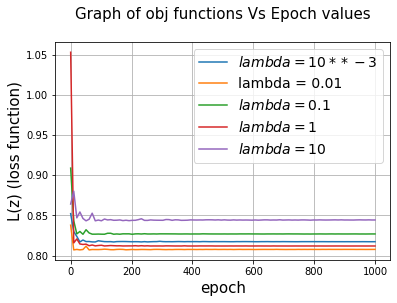

In [31]:
import matplotlib.pyplot as plt
num_epochs = 1000
lambda_arr = [10**-3,0.01, 0.1, 1, 10]
data = train_data
label = train_label
epochs = np.linspace(0,1000,100)
for lamda in lambda_arr:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  plt.plot(epochs, fval_array,label= r'$ $')
plt.grid()
plt.title('Graph of obj functions Vs Epoch values\n',fontsize=15)
plt.xlabel(r'epoch',fontsize=15)
plt.ylabel(r'L(z) (loss function)',fontsize=15)
plt.legend(["$lambda=10**-3$", "lambda = 0.01","$lambda=0.1$", "$lambda=1$","$lambda=10$"],fontsize=14)
plt.show()

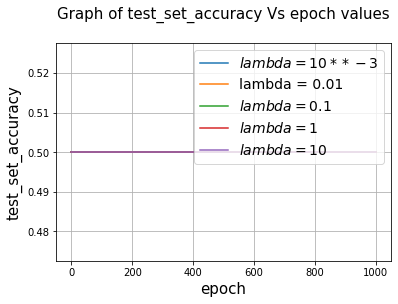

In [33]:
data = train_data
label = train_label
for lamda in lambda_arr:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  plt.plot(epochs, test_set_accuracy_array,label= r'$ $') 
plt.grid()
plt.title('Graph of test_set_accuracy Vs epoch values\n',fontsize=15)
plt.xlabel(r'epoch',fontsize=15)
plt.ylabel(r'test_set_accuracy',fontsize=15)
plt.legend(["$lambda=10**-3$", "lambda = 0.01","$lambda=0.1$", "$lambda=1$","$lambda=10$"],fontsize=14)
plt.show()

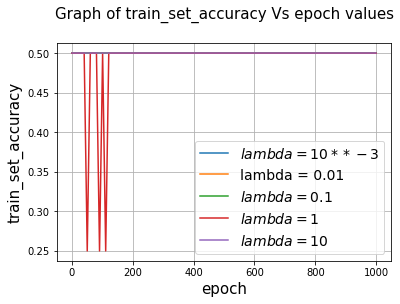

In [36]:
data = train_data
label = train_label
train_accuracy = []
test_accuracy = []
for lamda in lambda_arr:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  train_accuracy.append(train_set_accuracy_array)
  test_accuracy.append(test_set_accuracy_array)
  plt.plot(epochs, train_set_accuracy_array,label= r'$ $') 
plt.grid()
plt.title('Graph of train_set_accuracy Vs epoch values\n',fontsize=15)
plt.xlabel(r'epoch',fontsize=15)
plt.ylabel(r'train_set_accuracy',fontsize=15)
plt.legend(["$lambda=10**-3$", "lambda = 0.01","$lambda=0.1$", "$lambda=1$","$lambda=10$"],fontsize=14)
plt.show()

In [37]:
from tabulate import tabulate
data = [[lambda_arr[i],test_accuracy[i][-1],train_accuracy[i][-1]] for i in range(len(lambda_arr))]
head = ['Lamda','Final Test Accuracy','Final Train Accuracy']
print(tabulate(data, headers=head, tablefmt="pretty"))

+-------+---------------------+----------------------+
| Lamda | Final Test Accuracy | Final Train Accuracy |
+-------+---------------------+----------------------+
| 0.001 |         0.5         |         0.5          |
| 0.01  |         0.5         |         0.5          |
|  0.1  |         0.5         |         0.5          |
|   1   |         1.0         |         0.5          |
|  10   |         0.5         |         0.5          |
+-------+---------------------+----------------------+


We are getting final test and train accuracy as 0.5 for all the values of lamda.

#Que-7.

In [43]:
def compute_grad_loss_h(x,y,w,i):
  grad_loss_h = 0
  if np.multiply(y[i], np.dot(w, np.transpose(x[i]))) >= 1:
    grad_loss_h = np.multiply(lamda, w)/data.shape[0]
  else:
    grad_loss_h = np.subtract(np.multiply(lamda, w), np.multiply(y[i], np.transpose(x[i])))/data.shape[0]
  return grad_loss_h

def compute_objfnval_h(data,labels,w):
  a = np.multiply(lamda/2 , np.linalg.norm(w)**2)
  b = sum(compute_loss_h(w,x[i],y[i]) for i in range(data.shape[0]))
  return np.add(a, b/data.shape[0])

def compute_loss_h(w,x,y):
  z = np.zeros(len(y))
  w = np.reshape(w, [d,1])
  for i in range(len(y)):
    z[i] = (y[i]*np.matmul(w.T, np.reshape(x[i], [d,1]))).item()
  loss = [0 if z[i]>=1 else (1-z[i]) for i in range(len(z))]
  return np.array(loss)

In [39]:
def OPT1_h(data, label, lamda, epochs):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval_array = []
  test_set_accuracy_array = []
  train_set_accuracy_array = []
  x = data
  epoch = 0
  precision = False
  for epoch in range(epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_h(x,y,w,i))) # Update w using w <- w - step * g_i (w)
      t = t+1
    if epoch % 10 == 0:
      train_set_accuracy_array.append(compute_accuracy(train_data, train_label, w))
      test_set_accuracy_array.append(compute_accuracy(test_data, test_label, w))
      fval_array.append(compute_objfnval(data,label,w))
    epoch = epoch + 1
  return w, fval_array, test_set_accuracy_array, train_set_accuracy_array

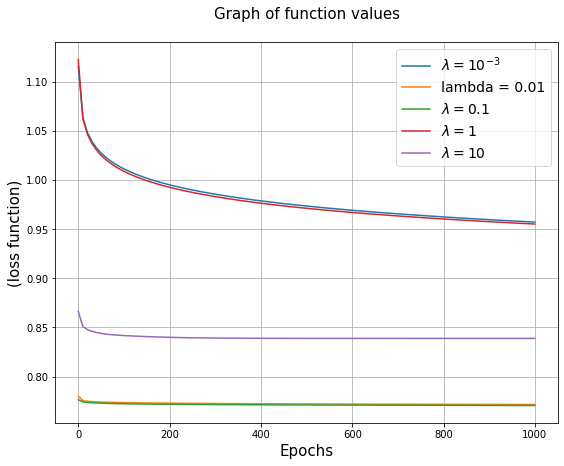

In [45]:
num_epochs = 1000
lambda_set = [10**-3,0.01, 0.1, 1, 10]
data = train_data
label = train_label
x = data
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1_h(data,label,lamda, num_epochs)
  plt.plot(epochs,fval_array,label=r'$ $')
plt.grid()
plt.title('Graph of function values\n',fontsize=15)
plt.xlabel(r'Epochs',fontsize=15)
plt.ylabel(r'(Function Values)',fontsize=15)
plt.legend(["$\lambda = 10^{-3}$","lambda = 0.01", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

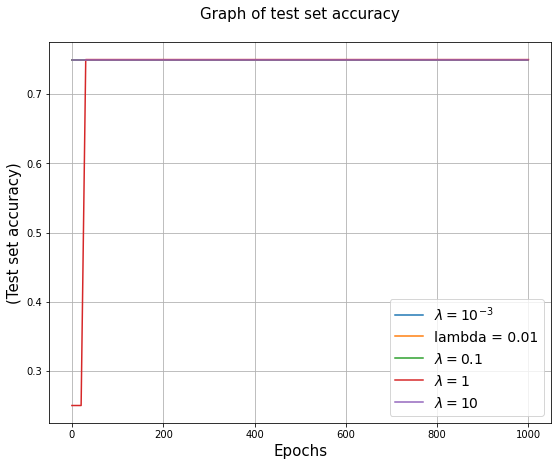

In [46]:
x = data
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1_h(data,label,lamda, num_epochs)
  plt.plot(epochs,test_set_accuracy_array,label=r'$ $')
plt.grid()
plt.title('Graph of test set accuracy\n',fontsize=15)
plt.xlabel(r'Epochs',fontsize=15)
plt.ylabel(r'(Test set accuracy)',fontsize=15)
plt.legend(["$\lambda = 10^{-3}$","lambda = 0.01", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

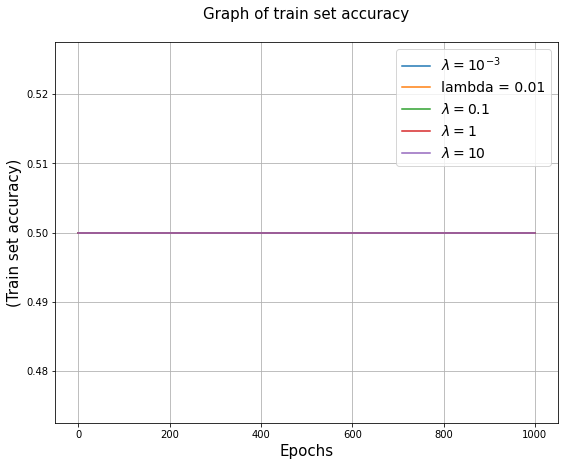

In [47]:
x = data
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1_h(data,label,lamda, num_epochs)
  plt.plot(epochs,train_set_accuracy_array,label=r'$ $')
plt.grid()
plt.title('Graph of train set accuracy\n',fontsize=15)
plt.xlabel(r'Epochs',fontsize=15)
plt.ylabel(r'(Train set accuracy)',fontsize=15)
plt.legend(["$\lambda = 10^{-3}$","lambda = 0.01", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

In [48]:
num_epochs = 1000
lambda_set = [0.001,0.01, 0.1, 1, 10]
data = train_data
label = train_label
Test_set_accuracy = []
Train_set_accuracy = []
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1_h(data,label,lamda, num_epochs)
  Test_set_accuracy.append(test_set_accuracy_array[-1])
  Train_set_accuracy.append(train_set_accuracy_array[-1])
import pandas as pd
data = {'Lambda':lambda_set,'Test set accuracy':Test_set_accuracy,'Train set accuracy':Train_set_accuracy}
df = pd.DataFrame (data, columns = ['Lambda','Test set accuracy','Train set accuracy'])
print (df)

   Lambda  Test set accuracy  Train set accuracy
0   0.001               0.75                 0.5
1   0.010               0.75                 0.5
2   0.100               0.75                 0.5
3   1.000               0.75                 0.5
4  10.000               0.75                 0.5


Modified Algorithm:

In [49]:
def OPT2_hinge(data, label, lamda):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval_array = []
  test_set_accuracy_array = []
  train_set_accuracy_array = []
  x = data
  epoch = 0
  precision = False
  while (epoch < 200 or precision == False):
    if epoch > 200:
      a2 = train_set_accuracy_array[-1] - train_set_accuracy_array[-10]
      if max(a2, -a2) < 10**-5:
        precision = True
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_h(x,y,w,i))) # Update w using w <- w - step * g_i (w)
      t = t+1
    if epoch % 10 == 0:
      train_set_accuracy_array.append(compute_accuracy(train_data, train_label, w))
      test_set_accuracy_array.append(compute_accuracy(test_data, test_label, w))
      fval_array.append(compute_objfnval(data,label,w))
    epoch = epoch + 1
  return w, fval_array, test_set_accuracy_array, train_set_accuracy_array

In [50]:
lambda_set = [0.001,0.01,0.1, 1, 10]
data = train_data
label = train_label
Test_set_accuracy = []
Train_set_accuracy = []
print("Using Hinge loss function with modified criterion:")
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT2_hinge(data,label,lamda)
  Test_set_accuracy.append(test_set_accuracy_array[-1])
  Train_set_accuracy.append(train_set_accuracy_array[-1])
import pandas as pd
data = {'Lambda':lambda_set,'Test set accuracy':Test_set_accuracy,'Train set accuracy':Train_set_accuracy}
df = pd.DataFrame (data, columns = ['Lambda','Test set accuracy','Train set accuracy'])
print (df)

Using Hinge loss function with modified criterion:
   Lambda  Test set accuracy  Train set accuracy
0   0.001               0.75                 0.5
1   0.010               0.75                 0.5
2   0.100               0.75                 0.5
3   1.000               0.75                 0.5
4  10.000               0.75                 0.5


#Que8.

Logistic loss(modified criterion):

In [51]:
def compute_loss_l(w,x,y):
  loss_l = np.log(np.add(1, np.exp(-np.dot(y, np.dot(w, np.transpose(x))))))
  return loss_l

def compute_objfnval_l(data,labels,w):
  a = np.multiply(lamda/2 , np.linalg.norm(w)**2)
  b = sum(compute_loss_l(w,x[i],y[i]) for i in range(data.shape[0]))
  fval_l = np.add(a, b/data.shape[0])
  return fval_l

def compute_grad_loss_l(data, label,w ,i):
  a = np.multiply(lamda, w)
  b = np.multiply(np.multiply(label[i], np.transpose(data[i])), np.exp(-np.dot(label[i], np.dot(w, np.transpose(data[i])))))
  c = np.add(1, np.exp(-np.dot(label[i], np.dot(w, np.transpose(data[i])))))
  grad_loss_l = np.subtract(a, b/c)/data.shape[0]
  return grad_loss_l

In [57]:
#using logistic loss function with modified stopping criterion
def OPT2_logistic(data, label, lamda):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval_array = []
  test_set_accuracy_array = []
  train_set_accuracy_array = []
  epochs = []
  x = data
  epoch = 0
  precision = False
  while (epoch < 200 or precision == False):
    if epoch > 200:
      a2 = train_set_accuracy_array[-1] - train_set_accuracy_array[-10]
      if max(a2, -a2) < 10**-5:
        precision = True
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_l(x,y,w,i))) # Update w using w <- w - step * g_i (w)
      t = t+1
    if epoch % 10 == 0:
      epochs.append(epoch)
      train_set_accuracy_array.append(compute_accuracy(train_data, train_label, w))
      test_set_accuracy_array.append(compute_accuracy(test_data, test_label, w))
      fval_array.append(compute_objfnval_l(data,label,w))
    epoch = epoch + 1
  return w, fval_array, test_set_accuracy_array, train_set_accuracy_array,epochs

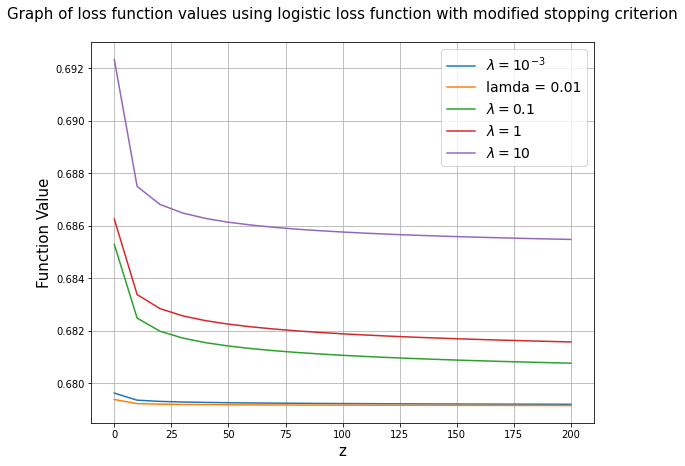

In [58]:
lambda_set = [0.001,0.01, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array,epochs = OPT2_logistic(data,label,lamda)
  plt.plot(epochs,fval_array,label=r'$ $')
plt.grid()
plt.title('Graph of loss function values using logistic loss function with modified stopping criterion\n',fontsize=15)
plt.xlabel(r'z',fontsize=15)
plt.ylabel(r'Function Value',fontsize=15)
plt.legend(["$\lambda = 10^{-3}$","lamda = 0.01", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

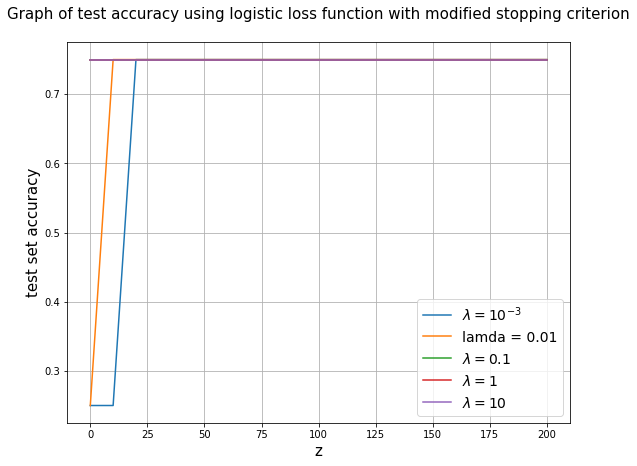

In [59]:
lambda_set = [0.001,0.01, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array,epochs = OPT2_logistic(data,label,lamda)
  plt.plot(epochs,test_set_accuracy_array,label=r'$ $')
plt.grid()
plt.title('Graph of test accuracy using logistic loss function with modified stopping criterion\n',fontsize=15)
plt.xlabel(r'z',fontsize=15)
plt.ylabel(r'test set accuracy',fontsize=15)
plt.legend(["$\lambda = 10^{-3}$","lamda = 0.01", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

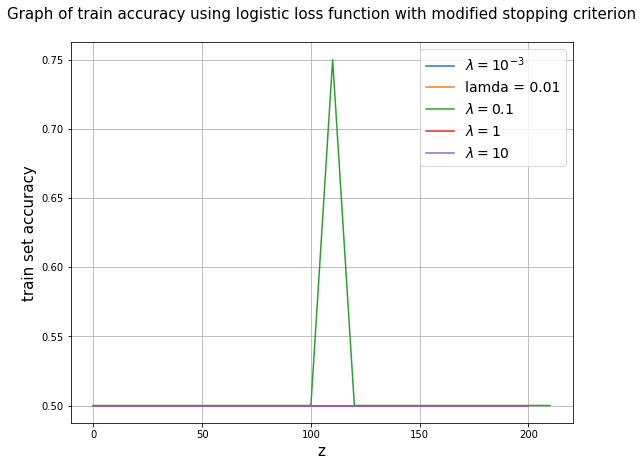

In [60]:
lambda_set = [0.001,0.01, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array,epochs = OPT2_logistic(data,label,lamda)
  plt.plot(epochs,train_set_accuracy_array,label=r'$ $')
plt.grid()
plt.title('Graph of train accuracy using logistic loss function with modified stopping criterion\n',fontsize=15)
plt.xlabel(r'z',fontsize=15)
plt.ylabel(r'train set accuracy',fontsize=15)
plt.legend(["$\lambda = 10^{-3}$","lamda = 0.01", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

In [63]:
Test_set_accuracy = []
Train_set_accuracy = []
lambda_set = [0.001,0.01, 0.1, 1, 10]
data = train_data
label = train_label
print("Using logistic loss function with modified stopping criterion")
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array,epochs = OPT2_logistic(data,label,lamda)
  Test_set_accuracy.append(test_set_accuracy_array[-1])
  Train_set_accuracy.append(train_set_accuracy_array[-1])
import pandas as pd
data = {'Lambda':lambda_set,'Test set accuracy':Test_set_accuracy,'Train set accuracy':Train_set_accuracy}
df = pd.DataFrame (data, columns = ['Lambda','Test set accuracy','Train set accuracy'])
print (df)

Using logistic loss function with modified stopping criterion
   Lambda  Test set accuracy  Train set accuracy
0   0.001               0.75                 0.5
1   0.010               0.75                 0.5
2   0.100               0.75                 0.5
3   1.000               0.75                 0.5
4  10.000               0.75                 0.5


Squared Hinge using Modified Algorithm:

In [64]:
def compute_loss_sh(w,x,y):
  a = np.subtract(1, np.dot(y, np.dot(w, np.transpose(x))))
  loss_sh = max(0, a)**2
  return loss_sh

def compute_objfnval_sh(data,labels,w):
  a = np.multiply(lamda/2 , np.linalg.norm(w)**2)
  b = sum(compute_loss_sh(w,x[i],y[i]) for i in range(data.shape[0]))
  fval_sh = np.add(a, b/data.shape[0])
  return fval_sh

def compute_grad_loss_sh(x,y,w,i):
  grad_loss_sh = 0
  if np.dot(y[i], np.dot(w, np.transpose(x[i]))) >= 1:
    grad_loss_sh = np.multiply(lamda, w)/data.shape[0]
  else:
    a = np.multiply(lamda, w)
    b = np.multiply(np.multiply(2, np.subtract(1, np.dot(y[i], np.dot(w, np.transpose(x[i]))))), np.multiply(y[i], np.transpose(x[i])))
    grad_loss_sh = np.subtract(a, b )/data.shape[0]
  return grad_loss_sh

In [65]:
def OPT1_Squared_hinge(data, label, lamda, num_epochs):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval_array = []
  test_set_accuracy_array = []
  train_set_accuracy_array = []
  epochs = []
  x = data
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_sh(x,y,w,i))) # Update w using w <- w - step * g_i (w)
      t = t+1
    if epoch % 10 == 0:
      epochs.append(epoch)
      train_set_accuracy_array.append(compute_accuracy(train_data, train_label, w))
      test_set_accuracy_array.append(compute_accuracy(test_data, test_label, w))
      fval_array.append(compute_objfnval_sh(data,label,w))
  return w, fval_array, test_set_accuracy_array, train_set_accuracy_array,epochs

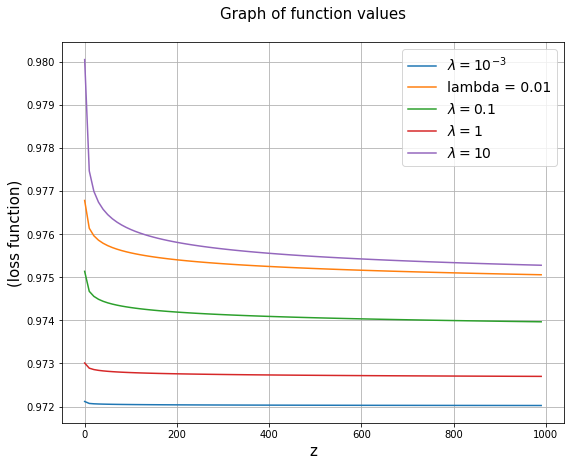

In [66]:
num_epochs = 1000
lambda_set = [0.001,0.01, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array,epochs = OPT1_Squared_hinge(data,label,lamda, num_epochs)
  plt.plot(epochs,fval_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of function values\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'(loss function)',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$", "lambda = 0.01","$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

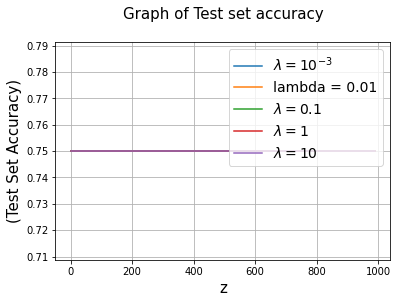

In [67]:
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array,epochs = OPT1_Squared_hinge(data,label,lamda, num_epochs)
  plt.plot(epochs,test_set_accuracy_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of Test set accuracy\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'(Test Set Accuracy)',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$", "lambda = 0.01","$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

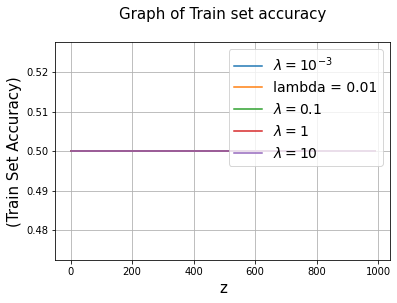

In [68]:
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array,epochs = OPT1_Squared_hinge(data,label,lamda, num_epochs)
  plt.plot(epochs,train_set_accuracy_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of Train set accuracy\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'(Train Set Accuracy)',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$", "lambda = 0.01","$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

In [70]:
lambda_set = [10**-3,0.01, 0.1, 1, 10]
data = train_data
label = train_label
Test_set_accuracy = []
Train_set_accuracy = []
print("Using squared hinge loss function:")
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array,epochs = OPT1_Squared_hinge(data,label,lamda, num_epochs)
  Test_set_accuracy.append(test_set_accuracy_array[-1])
  Train_set_accuracy.append(train_set_accuracy_array[-1])
import pandas as pd
data = {'Lambda':lambda_set,'Test set accuracy':Test_set_accuracy,'Train set accuracy':Train_set_accuracy}
df = pd.DataFrame (data, columns = ['Lambda','Test set accuracy','Train set accuracy'])
print (df)

Using squared hinge loss function:
   Lambda  Test set accuracy  Train set accuracy
0   0.001               0.75                 0.5
1   0.010               0.75                 0.5
2   0.100               0.75                 0.5
3   1.000               0.75                 0.5
4  10.000               0.75                 0.5


Squared Hinge loss using modified algorithm:

In [73]:
def OPT2_Squared_hinge_loss(data, label, lamda):
  t = 1
  #initialize w
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  fval_array = []
  test_set_accuracy_array = []
  train_set_accuracy_array = []
  Epoch = []
  x = data
  epoch = 0
  precision = False
  while (epoch < 200 or precision == False):
    if epoch > 200:
      a2 = train_set_accuracy_array[-1] - train_set_accuracy_array[-10]
      if max(a2, -a2) < 10**-5:
        precision = True
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      w = np.subtract(w, np.multiply(step, compute_grad_loss_sh(x,y,w,i))) # Update w using w <- w - step * g_i (w)
      t = t+1
    if epoch % 10 == 0:
      Epoch.append(epoch)
      train_set_accuracy_array.append(compute_accuracy(train_data, train_label, w))
      test_set_accuracy_array.append(compute_accuracy(test_data, test_label, w))
      fval_array.append(compute_objfnval_sh(data,label,w))
    epoch = epoch + 1
  return w, fval_array, test_set_accuracy_array, train_set_accuracy_array,Epoch

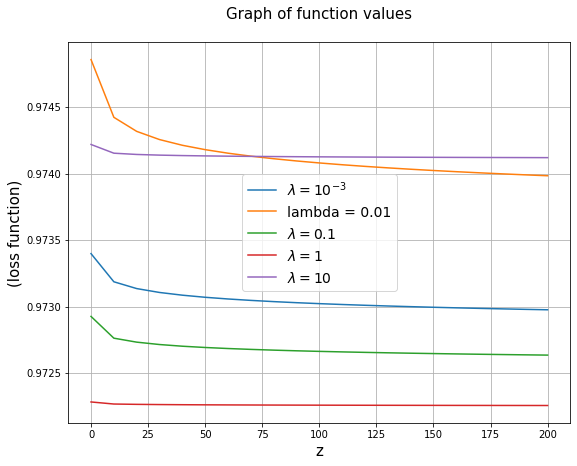

In [75]:
lambda_set = [0.001,0.01, 0.1, 1, 10]
data = train_data
label = train_label
plt.figure(figsize=(9,7))
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array,epochs = OPT2_Squared_hinge_loss(data,label,lamda)
  plt.plot(epochs,fval_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of function values\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'(loss function)',fontsize=15)
  plt.legend(loc = 'upper right')
  plt.legend(["$\lambda = 10^{-3}$", "lambda = 0.01","$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

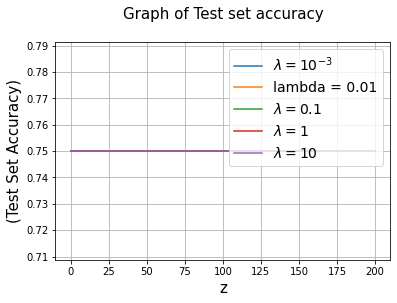

In [76]:
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array,epochs = OPT2_Squared_hinge_loss(data,label,lamda)
  plt.plot(epochs,test_set_accuracy_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of Test set accuracy\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'(Test Set Accuracy)',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$", "lambda = 0.01","$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

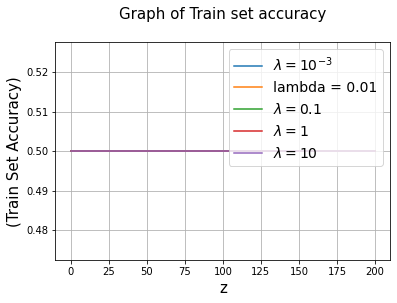

In [77]:
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array,epochs = OPT2_Squared_hinge_loss(data,label,lamda)
  plt.plot(epochs,train_set_accuracy_array,label=r'$ $')
  plt.grid()
  plt.title('Graph of Train set accuracy\n',fontsize=15)
  plt.xlabel(r'z',fontsize=15)
  plt.ylabel(r'(Train Set Accuracy)',fontsize=15)
  plt.legend(["$\lambda = 10^{-3}$", "lambda = 0.01","$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

In [78]:
lambda_set = [10**-3,0.01, 0.1, 1, 10]
data = train_data
label = train_label
Test_set_accuracy = []
Train_set_accuracy = []
print("Using squared hinge loss function with modified algorithm: ")
for lamda in lambda_set:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array,epochs = OPT2_Squared_hinge_loss(data,label,lamda)
  Test_set_accuracy.append(test_set_accuracy_array[-1])
  Train_set_accuracy.append(train_set_accuracy_array[-1])
import pandas as pd
data = {'Lambda':lambda_set,'Test set accuracy':Test_set_accuracy,'Train set accuracy':Train_set_accuracy}
df = pd.DataFrame (data, columns = ['Lambda','Test set accuracy','Train set accuracy'])
print (df)

Using squared hinge loss function with modified algorithm: 
   Lambda  Test set accuracy  Train set accuracy
0   0.001               0.75                 0.5
1   0.010               0.75                 0.5
2   0.100               0.75                 0.5
3   1.000               0.75                 0.5
4  10.000               0.75                 0.5
